In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [3]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
target_names=iris.target_names
labels=target_names[target]

In [5]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [6]:
setosa_petal_length=features[labels=='setosa',2]
setosa_petal_width=features[labels=='setosa',3]
setosa=np.c_[setosa_petal_length,setosa_petal_width]
versicolor_petal_length=features[labels=='versicolor',2]
versicolor_petal_width=features[labels=='versicolor',3]
versicolor=np.c_[versicolor_petal_length,versicolor_petal_width]
virginica_petal_length=features[labels=='virginica',2]
virginica_petal_width=features[labels=='virginica',3]
virginica=np.c_[virginica_petal_length,virginica_petal_width]

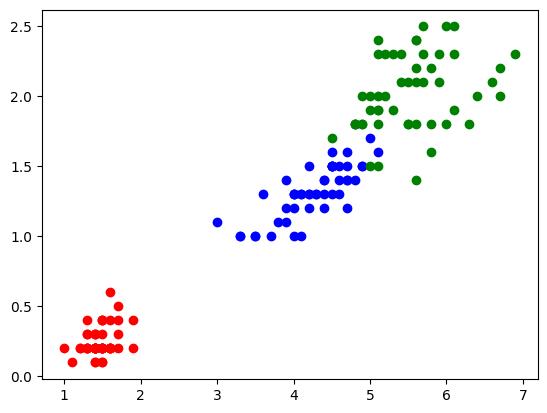

In [7]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [8]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

In [9]:
clf=svm.LinearSVC()
clf.fit(training_data,training_labels)

LinearSVC()

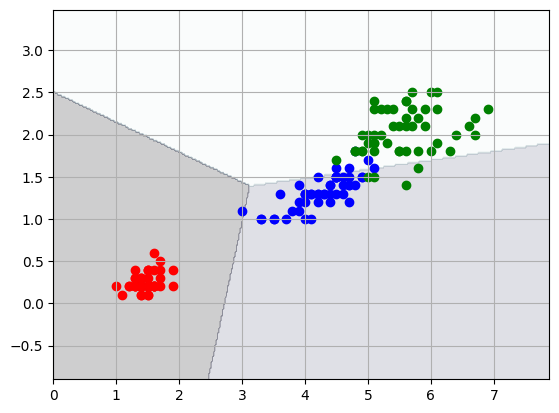

In [10]:
training_x_min=training_data[:,0].min()-1
training_x_max=training_data[:,0].max()+1
training_y_min=training_data[:,1].min()-1
training_y_max=training_data[:,1].max()+1
grid_interval=0.02
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')
plt.show()

# 重要參數
## C: 懲罰係數，C愈大代表容忍錯誤的程度愈低，愈容易造成過度擬和的問題。
## gamma: 決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto')
## kernel: 決定不同的核函數，如: linear, poly, rbf, sigmoid等等

In [11]:
def SVM_plot(clf,title):
    training_x_min=training_data[:,0].min()-1
    training_x_max=training_data[:,0].max()+1
    training_y_min=training_data[:,1].min()-1
    training_y_max=training_data[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(setosa[:,0],setosa[:,1],color='red')
    plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
    plt.scatter(virginica[:,0],virginica[:,1],color='green')
    plt.title(title)
    plt.show()

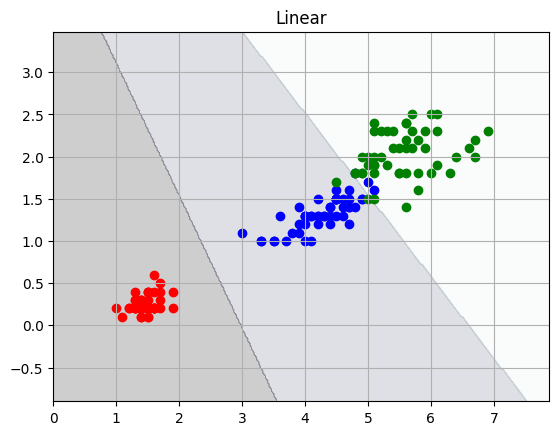

In [12]:
clf=svm.SVC(kernel='linear')
clf.fit(training_data,training_labels)
SVM_plot(clf,'Linear')

## 換特徵

In [13]:
setosa_sepal_length=features[labels=='setosa',0]
setosa_sepal_width=features[labels=='setosa',1]
setosa=np.c_[setosa_sepal_length,setosa_sepal_width]
versicolor_sepal_length=features[labels=='versicolor',0]
versicolor_sepal_width=features[labels=='versicolor',1]
versicolor=np.c_[versicolor_sepal_length,versicolor_sepal_width]
virginica_sepal_length=features[labels=='virginica',0]
virginica_sepal_width=features[labels=='virginica',1]
virginica=np.c_[virginica_sepal_length,virginica_sepal_width]

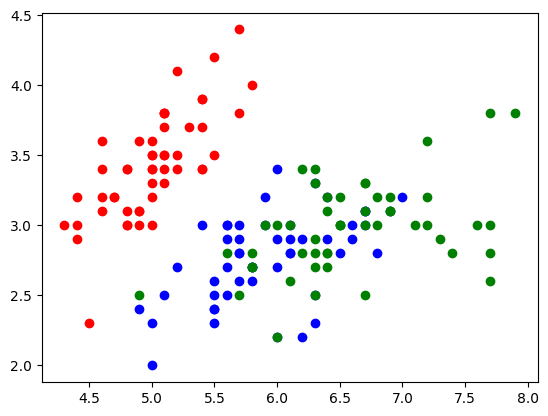

In [14]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [15]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

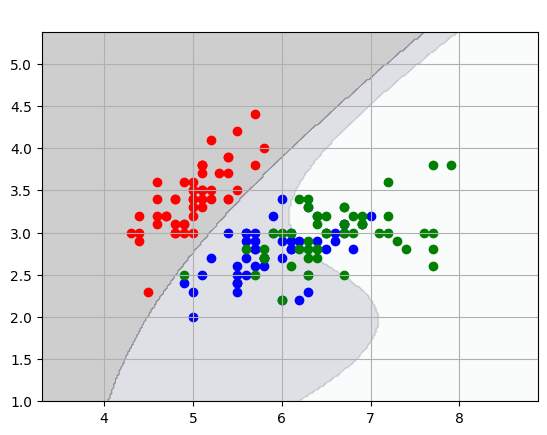

In [16]:
clf=svm.SVC(kernel='poly',C=1000)
clf.fit(training_data,training_labels)
SVM_plot(clf,' ')

# 整體流程

## Step1. 下載資料

In [17]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

## Step2. 區分訓練集與測試集

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

## Step3. 建模

In [19]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='poly')

## Step4. 預測

In [20]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## Step5. 準確度分析

In [21]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.9777777777777777
